# Logistic Function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

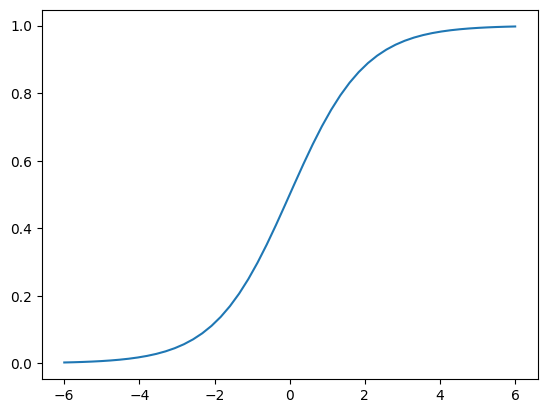

In [2]:
def logistic(x):
  return np.exp(x)/ (1+np.exp(x))


x = np.linspace(-6,6,50, dtype = float)

y = logistic(x)
plt.plot(x,y)

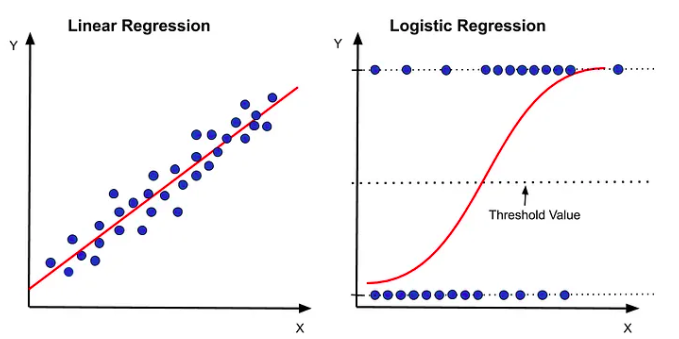

Data used in Logistic Regression:
- Binomial : 2 possible values e.g: 0/1, Yes/No
- Multinomial : 3 or more possible dependent variables e.g Age = {young, middle, aged}
- ordinal : 3 or more possible ordered typed of independent variable.
- e.g : Poor , Good, very Good
- e.g Low, Medium , High



# Build Model: Logistic Regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/LaptopPurchased.csv')

In [6]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [7]:
df.shape

(400, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<Axes: xlabel='Purchased', ylabel='count'>

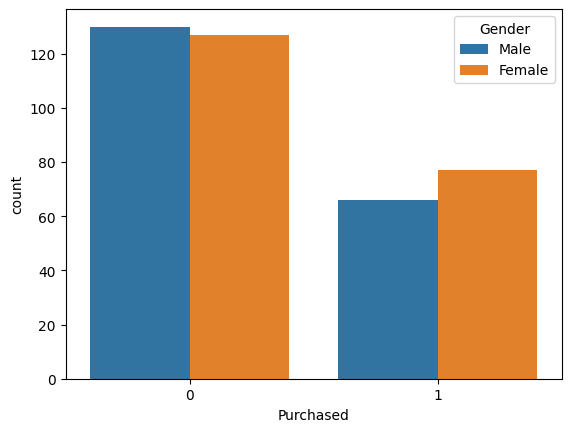

In [10]:
sns.countplot(x = 'Purchased',hue='Gender', data =df)

# Observations:
1. In Non-purchased(0) Male are more compare to female.
2. Similarly in purchased (1 ) females count is more than Male.

<ipython-input-11-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

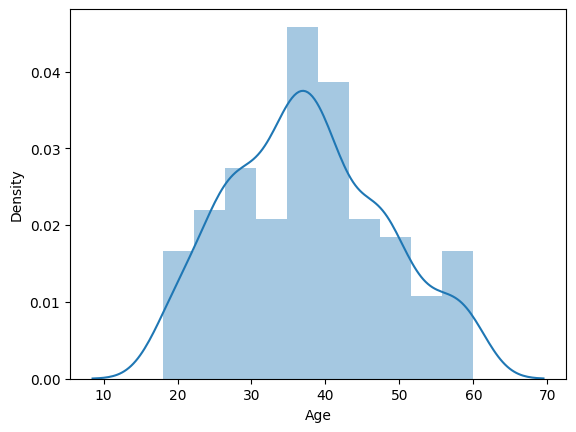

In [11]:
sns.distplot(df['Age'])

<ipython-input-12-cca866f85a80>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EstimatedSalary'])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

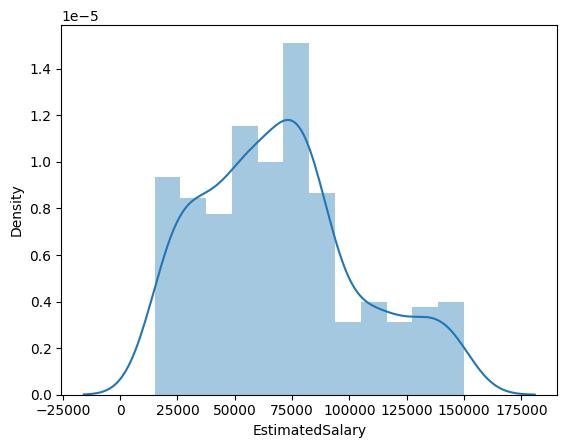

In [12]:
sns.distplot(df['EstimatedSalary'])

In [13]:
#Independent Variable
X = df[['Age', 'EstimatedSalary']]

In [14]:
#dependent Variable
y = df['Purchased']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [17]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [18]:
X_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
216,49,65000
259,45,131000
49,31,89000
238,46,82000


In [19]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model Building with Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [22]:
#Prediction
prediction = model.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [23]:
#Check the performance of  the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
#Confusion Matrics
print(confusion_matrix(y_test, prediction))

[[75  4]
 [ 9 32]]


In [25]:
print(accuracy_score(y_test, prediction))

0.8916666666666667


In [26]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        79
           1       0.89      0.78      0.83        41

    accuracy                           0.89       120
   macro avg       0.89      0.86      0.88       120
weighted avg       0.89      0.89      0.89       120

